<a href="https://colab.research.google.com/github/MashaKubyshina/solving_work_data_analytics_problems/blob/main/Optimizing_VR_reporting_from_3_sources.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**WHY THIS SCRIPT EXISTS**

I wrote this script to speed up my data pulling and reporting.
We create reports using 3 data sources: Chatfuel platform (chatbot), Facebook Ads, and Rock to Vote (registration data). Doing this in the spreadsheet used to take about 2 hours.

I will delete some of the outputs not to reveal personal information from the database.

### **Quick reports on Voter Registration metrics in Virginia from FB ads**

**Goal of this tempalte** is to facilitate reporting of voter registration metrics. This script allows to pull a customized report with key voter registrations metrics from 3 different data scources in less than 5 minutes.
It used to take my team around 2 hours to pull this report by using excel and going through each data sheet manually. 

This template can be used for any state. In this template I am using the state of Virginia.

**Key questions it will help you answer**

This report will answer questions such as:


*   What is the cost of registering to vote a user coming from Facebook Ads?
*   What percent of users clicking on our ads is already registered to vote?
*   How many users in our audience will take action and register to vote?


**What you need before running the code**

To use this template you will need the following data sheets downloaded on your machine:


*   Chatfuel data in csv (select the user segment in people's tab using unique defining attribute and export users selecting all the attributes, click on "select all")
*   Facebook Ads data in xlsx (go to the ad campaign and create a report only using "ad set" as a parameter, don't include "ad name", pay attention to the date range you select in FB Ads, the results might be wrong or different if wrong dates are selected)
*   Rock To Vote data in csv (download a report by selecting the proper data range)

**Adding the data to your code**

After you have downloaded all the data to your machine, you will add it to your files folder by clicking on the file icon on the right. Click on the option "Upload to session storage" and upload all 3 sheets here. The 3 data sheets will appear next to "sample data" folder.
Next you need to copy the path of each sheet by clicking on 3 dots next to each file name and clicking on "copy path". You will paste this path in the spaces provided in the top portion of this code.

Now you can go through the code and follow the instructions hashed in green.
 





In [40]:
# Import librarires

import pandas as pd
import numpy as np

In [ ]:
# Copy the path from Chatfuel data by clicking on 3 dots next to the file name
# Paste this path in the place of the previous path, you will replace the "/content/Localyst_2021_09_28_20_16_04.csv" bit)
# If needed please read the instructions above

cf_data=pd.read_csv("/content/Localyst_2021_09_29_01_25_52.csv")
cf_data.head(3)

In [ ]:
# Copy the path from Rock to Vote data by clicking on 3 dots next to the file name
# Paste this path in the place of the previous path, you will replace the "/content/registrants-report_20210601_20210928.csv" bit)
# If needed please read the instructions above

rv_data=pd.read_csv("/content/registrants-report_20210901_20210928.csv")
rv_data.head(3)

In [ ]:
# Copy the path from Facebook Ads data by clicking on 3 dots next to the file name
# Paste this path in the place of the previous path, you will replace the "/content/Virginia_09-28_new.xlsx" bit)
# If needed please read the instructions above

fb_data=pd.read_excel("/content/Virginia_28_final.xlsx")
fb_data.head(3)

**If you have succesfully copied and pasted the 3 paths, you can run the whole script.**
To run the script go to "Runtime" in the top menu and click on "Run all".
The script will pause when it will ask you to enter your authentification to mount the drive to place the produced report on it. You will find more instructions at that step.

In [44]:
# set bold style for headers

class style:
   BOLD = '\033[1m'
   END = '\033[0m'

In [ ]:
# Rename the 'Tracking Source' column in Rock to Vote data to exlude spaces

rv_data = rv_data.rename(columns={'Tracking Source':'Source'})
rv_data.head(3)

In [46]:
# Check all sources from Rock to Vote in this dataframe

rv_data['Source'].value_counts()

ImpactAstory                           117
Impactfeed                              93
localyst_legalize_Georgia_ad            42
localyst_Virginia_ad_not_registered      7
localyst_Virginia_ad_unsure              5
ImpactAfeed                              4
btjamesajanisse                          3
[name]                                   3
btchristineschiefer                      1
Name: Source, dtype: int64

In [ ]:
# Drop first row from the dataframe in Facebook ads data

fb_data.drop([0], inplace = True)
fb_data.head(3)

In [ ]:
# Grab the first row and make it the dataframe header in Facebook Ads data

new_header = fb_data.iloc[0] #grab the first row for the header
fb_data.columns = new_header #set the header row as the df header
fb_data.drop([1], inplace = True) # drop the first row (only use this line if it is an extra text header)
fb_data.head(10)

In [49]:
# Check columns in Facebook Ads data

fb_data.columns

Index([                        nan,               'Ad Set Name',
                               nan,           'Delivery Status',
                  'Delivery Level',             'Campaign Name',
             'Attribution Setting',               'Result Type',
                         'Results',                     'Reach',
                     'Impressions',           'Cost per Result',
                 'Quality Ranking',   'Engagement Rate Ranking',
         'Conversion Rate Ranking',        'Amount Spent (USD)',
       'New Messaging Connections',               'Link Clicks',
                'Reporting Starts',            'Reporting Ends'],
      dtype='object', name=1)

In [50]:
# Rename certian columns in Facebook Ads data to avoid spaces

fb_data = fb_data.rename(columns={'Ad Name':'ad_name'})
fb_data = fb_data.rename(columns={'Campaign Name':'campaign_name'})
fb_data = fb_data.rename(columns={'Ad Set Name':'adset_name'})
fb_data = fb_data.rename(columns={'New Messaging Connections':'new_messaging_connections'})
fb_data = fb_data.rename(columns={'Cost per Result':'cost_per_result'})
fb_data = fb_data.rename(columns={'Amount Spent (USD)':'amount_spent_usd'})
fb_data = fb_data.rename(columns={'Link Clicks':'link_clicks'})
fb_data.columns

Index([                        nan,                'adset_name',
                               nan,           'Delivery Status',
                  'Delivery Level',             'campaign_name',
             'Attribution Setting',               'Result Type',
                         'Results',                     'Reach',
                     'Impressions',           'cost_per_result',
                 'Quality Ranking',   'Engagement Rate Ranking',
         'Conversion Rate Ranking',          'amount_spent_usd',
       'new_messaging_connections',               'link_clicks',
                'Reporting Starts',            'Reporting Ends'],
      dtype='object', name=1)

In [ ]:
# Delete rows in Facebook Ads Data where "results" and "adset_name" column values are NaN (this allows us to delete summary rows)

fb_data = fb_data.dropna(subset=['Results', 'adset_name'])
fb_data

In [52]:
# fb results sum of all adsets

fb_results=fb_data['Results'].sum()
fb_results

428

In [53]:
# fb results sum of all adsets

fb_cost_per_result_r=fb_data['cost_per_result'].mean()
fb_cost_per_result='${:0,.2f}'.format(fb_data['cost_per_result'].mean())
fb_cost_per_result

'$4.40'

In [54]:
# fb ad spend all adsets

fb_total_ad_spend_r=fb_data['amount_spent_usd'].sum()
fb_total_ad_spend='${:0,.2f}'.format(fb_data['amount_spent_usd'].sum())
fb_total_ad_spend

'$1,474.09'

In [55]:
# fb new messaging conversations started

fb_new_messaging_connections=fb_data['new_messaging_connections'].sum()
fb_new_messaging_connections

423

In [56]:
# check all unique adset names

fb_data['adset_name'].unique()

array(['virginia_vr_pre-test_winners_and_new_pp_09_21_21',
       'virginia_vr_pre-test_keep_it_legal',
       'virginia_vr_pre-test_broadband', 'virginia_vr_pre-test_new_house',
       'virginia_vr_pre-test_abortion', 'virginia_vr_pre-test_climate',
       'virginia_vr_pre-test_transportation',
       'virginia_vr_pre-test_abortion_texas'], dtype=object)

In [ ]:
# Slice the data from Rock to Vote we are going to work with

ge_rv_data=rv_data[(rv_data['Source'] == 'localyst_Virginia_ad_unsure') | (rv_data['Source'] ==  'localyst_Virginia_ad_not_registered')]
ge_rv_data.head(10)

In [58]:
# Save total number of Chatfuel subscribers

total_cf_subscribers=len(cf_data)
total_cf_subscribers

343

In [59]:
# Check the values for registered_to_vote attribute in CF

cf_data['registered_to_vote'].value_counts()

yes_virginia_2021       198
no_virginia_2021         39
unsure_virginia_2021     12
Name: registered_to_vote, dtype: int64

In [60]:
cf_data['issue'].value_counts()

keep_legal                116
broadband                 100
climate                    50
new_house                  34
historic_figures_women     18
abortion                   14
transportation              9
conflict_people             2
Name: issue, dtype: int64

In [61]:
cf_data['sign_petition'].value_counts()

vr_flow_virginia_2021_keep_legal                71
vr_flow_virginia_2021_broadband                 42
vr_flow_virginia_2021_weed                      32
vr_flow_virginia_2021_climate                   17
vr_flow_virginia_2021_historic_figures_women    15
vr_flow_virginia_2021_new_house                 13
vr_flow_virginia_2021_abortion                   6
vr_flow_virginia_2021_transportation             3
vr_flow_virginia_2021_conflict_people            1
Name: sign_petition, dtype: int64

In [62]:
# Save total number of petition signatures

sign_petition=sum(cf_data['sign_petition'].value_counts())
sign_petition

200

In [63]:
# Save total number of phone number aks

phones_cf=sum(cf_data['phone_number'].value_counts())
phones_cf

102

In [64]:
# Save total number of share agrees
share_agree=sum(cf_data['share_card_received'].value_counts())
share_agree

74

In [ ]:
# Save a slice of data with phone numbers that are digits (not words)

phone_list=cf_data[cf_data['phone_number'].apply(lambda x: str(x).isdigit())]
phone_list

In [66]:
# Save total number of phone numbers submitted as digits

number_phones_submitted=len(phone_list['phone_number'].value_counts())
number_phones_submitted

67

In [67]:
# Create, format and save all the values we need for our report

completed=len(ge_rv_data[ge_rv_data['Status'] == 'Complete'])
started=len(ge_rv_data[ge_rv_data['Status'] != 'Complete'])
total=completed+started
cost_per_registered_user='${:0,.2f}'.format(fb_total_ad_spend_r/completed)
cost_per_registration_started='${:0,.2f}'.format(fb_total_ad_spend_r/total)
not_registered_cf=len(cf_data[cf_data['registered_to_vote']== 'no_virginia_2021'])
unsure_cf=len(cf_data[cf_data['registered_to_vote']== 'unsure_virginia_2021'])
not_vr_cf=not_registered_cf+unsure_cf
cost_not_registered='${:0,.2f}'.format(fb_total_ad_spend_r/not_vr_cf)
percent_completed='{:.0%}'.format(completed / total)
cf_rtv_completed='{:.0%}'.format(completed/not_vr_cf)
cf_rtv_started='{:.0%}'.format(total/not_vr_cf)
registered_cf=len(cf_data[cf_data['registered_to_vote']== 'yes_virginia_2021'])
total_cf=not_registered_cf+registered_cf+unsure_cf
percent_not_reg='{:.0%}'.format(not_vr_cf/total_cf)
cf_rtv_completed_from_all='{:.0%}'.format(completed/total_cf)
registered_cf=len(cf_data[cf_data['registered_to_vote']== 'yes_virginia_2021'])
cost_per_result_cf='${:0,.2f}'.format(fb_total_ad_spend_r/total_cf_subscribers)
percent_registered_vote='{:.0%}'.format(registered_cf/total_cf)

In [83]:
new_df = [
          ['Total Ad Spend (USD)', fb_total_ad_spend],
          ['Total Subscribers Acquired FB (Results)', fb_results],
          ['Total Subscribers Acquired CF', total_cf_subscribers],
          ['Cost Per Result FB Ads (USD)', fb_cost_per_result],
          ['Cost Per Acquisition CF', cost_per_result_cf],
          ['Already Registered to Vote', registered_cf],
          ['% of Already Registered To Vote', percent_registered_vote],
          ['Number Not Registered or Not Sure', not_vr_cf],
          ['% of Not Registered or Not Sure', percent_not_reg],
          ['Total Started & Not Completed Registrations', started], 
          ['Total Completed Registrations', completed],
          ['% of Not Registered who Complete Registrations From All Chatfuel Users', cf_rtv_completed_from_all],
          ['% of Not Registered who Complete Registrations From All Not Registered or Not Sure Chatfuel Users', cf_rtv_completed], 
          ['% of Not Registered who Complete Registrations Within Rock to Vote', percent_completed],
          ['Total Petitions Signed', sign_petition],
          ['Total Phone Numbers Opted In', number_phones_submitted],
          ['Total Agree to Relational Shares', share_agree],
          ['Cost Per Registration Completed From FB Ads (USD)', cost_per_registered_user],
          ['Cost Per Registration Started From FB Ads (USD)', cost_per_registration_started], 
          ['Cost Per Not Registered or Not Sure User (USD)', cost_not_registered],
          ['Total Registrations Started:', total],
          ['% of Started Registrations From FB Ads (Not Registered or Not Sure) To Rock to Vote', cf_rtv_started],      
          ['Not Registered To Vote From FB Ads', not_registered_cf],
          ['Unsure About Their Registrations Status From FB Ads', unsure_cf],     
          ['Total Amount Of Action Takers In CF', registered_cf+unsure_cf+not_registered_cf],   
        ]
 
# Create dataframe
vr_metrics = pd.DataFrame(new_df, columns = ['Description', 'Metric'])
vr_metrics

,Description,Metric
0,Total Ad Spend (USD),"$1,474.09"
1,Total Subscribers Acquired FB (Results),428
2,Total Subscribers Acquired CF,343
3,Cost Per Result FB Ads (USD),$4.40
4,Cost Per Acquisition CF,$4.30
5,Already Registered to Vote,198
6,% of Already Registered To Vote,80%
7,Number Not Registered or Not Sure,51
8,% of Not Registered or Not Sure,20%
9,Total Started & Not Completed Registrations,11


In [69]:
# Check the "Status" column values in Rock to Vote

ge_rv_data['Status'].value_counts()

Step 1      10
Step 3       1
Complete     1
Name: Status, dtype: int64

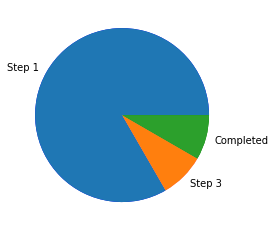

In [70]:
# Create a simple plot to visualize voter registration status

import matplotlib.pyplot as plt

y = np.array(ge_rv_data['Status'].value_counts())

mylabels = ["Step 1", "Step 3", "Completed"]
#myexplode = [0.2, 0, 0, 0]
mycolors = ["blue", "hotpink", "green", "yellow"]

plt.pie(y, labels = mylabels, colors=mycolors)
plt.pie(y)
plt.show() 

In [ ]:
# EDA: subgroup by social issue

cf_data_issue = cf_data.groupby(['issue', 'registered_to_vote'])
cf_data_issue.first()

In [72]:
# EDA: registration status by issue

cf_issue = cf_data[['issue', 'registered_to_vote']]
cf_issue.value_counts()

issue                   registered_to_vote  
keep_legal              yes_virginia_2021       73
broadband               yes_virginia_2021       56
climate                 yes_virginia_2021       30
broadband               no_virginia_2021        18
historic_figures_women  yes_virginia_2021       14
new_house               yes_virginia_2021       14
keep_legal              no_virginia_2021        13
abortion                yes_virginia_2021        7
keep_legal              unsure_virginia_2021     4
transportation          yes_virginia_2021        3
new_house               no_virginia_2021         3
broadband               unsure_virginia_2021     3
abortion                no_virginia_2021         2
climate                 no_virginia_2021         2
                        unsure_virginia_2021     2
new_house               unsure_virginia_2021     2
historic_figures_women  no_virginia_2021         1
abortion                unsure_virginia_2021     1
conflict_people         yes_virginia_

In [73]:
# EDA: petition signature by issue

cf_issue = cf_data[['issue', 'sign_petition']]
cf_issue.value_counts()

issue                   sign_petition                               
keep_legal              vr_flow_virginia_2021_keep_legal                71
broadband               vr_flow_virginia_2021_broadband                 40
                        vr_flow_virginia_2021_weed                      17
climate                 vr_flow_virginia_2021_climate                   16
historic_figures_women  vr_flow_virginia_2021_historic_figures_women    14
new_house               vr_flow_virginia_2021_new_house                 13
climate                 vr_flow_virginia_2021_weed                      13
abortion                vr_flow_virginia_2021_abortion                   6
transportation          vr_flow_virginia_2021_transportation             3
new_house               vr_flow_virginia_2021_historic_figures_women     1
                        vr_flow_virginia_2021_broadband                  1
keep_legal              vr_flow_virginia_2021_weed                       1
                        vr_flow

**Here you need to click on the link and it will create a authentification token that you will plaste in the space provided in the code**

Click on the link that appears after "Go to this URL in a browser:"
Chose your google account, sign in, copy the token.
Paste the token in the slot provided in the script and click "enter".

In [74]:
# Mount drive from google

from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [75]:
# Export metrics report back to files
# The files will be in the same folder where you uploaded the data

vr_metrics.to_csv('Voter_Registration_Metrics_Virginia.csv')
!cp Voter_Registration_Metrics_Virginia.csv "drive/My Drive/"

In [76]:
# Export VR data report back to files, this report can be used to call those who dropped before completing the process
# The files will be in the same folder where you uploaded the data

ge_rv_data.to_csv('Virginia_Rock-to-Vote_data.csv')
!cp Virginia_Rock-to-Vote_data.csv "drive/My Drive/"

In [ ]:
# Save a segment of users who completed the registration on Rock to Vote

ge_rv_data_completed=ge_rv_data[ge_rv_data.Status == 'Complete']
ge_rv_data_completed

In [ ]:
# Save a segment of users who didn't complete the registration on Rock to Vote

ge_rv_data_not_completed=ge_rv_data[ge_rv_data.Status != 'Complete']
ge_rv_data_not_completed